In [1]:
library(ggplot2)
install.packages("plyr")
library(plyr)
options(repr.plot.width = 7, repr.plot.height = 5)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Rcpp’




In [6]:
candle <- read.csv("candles.csv")
#candle

In [4]:
id <- 1:14
id

[1]  1  2  3  4  5  6  7  8  9 10 11 12 13 14

In [7]:
readSpeed <- candle$readSpeed[1:14] - candle$readSpeed[15:28]
readSpeed

[1]  4 -1  2  5  5  0  7  2  4  6 -2  3  3  1

In [8]:
rep("SPAM", 10)

[1] "SPAM" "SPAM" "SPAM" "SPAM" "SPAM" "SPAM" "SPAM" "SPAM" "SPAM" "SPAM"

In [9]:
lightLvl <- rep("Difference", 14)
lightLvl

[1] "Difference" "Difference" "Difference" "Difference" "Difference"
 [6] "Difference" "Difference" "Difference" "Difference" "Difference"
[11] "Difference" "Difference" "Difference" "Difference"

In [13]:
diffScores <- data.frame(id, readSpeed, lightLvl)
#diffScores

In [12]:
new_candle <- rbind(candle, diffScores)
#new_candle

In [16]:
plotData <- ddply(new_candle, c("lightLvl"), summarise,
                  n = length(readSpeed),
                  Mean = mean(readSpeed),
                  df = n - 1,
                  alpha = 0.05,
                  t_crit = qt(alpha/2, df = df, lower.tail = FALSE),
                  se = sd(readSpeed) / sqrt(n),
                  MOE = t_crit * se,
                  CI_bot = Mean - MOE,
                  CI_top = Mean + MOE
)

plotData

lightLvl,n,Mean,df,alpha,t_crit,se,MOE,CI_bot,CI_top
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Bright,14,89.357143,13,0.05,2.160369,0.8682883,1.875823,87.481320,91.23297
Difference,14,2.785714,13,0.05,2.160369,0.7046047,1.522206,1.263508,4.30792
Dim,14,86.571429,13,0.05,2.160369,0.7391284,1.596790,84.974639,88.16822


In [26]:
plotData$lightLvl <- factor(plotData$lightLvl, 
                            levels = c("Bright", "Dim", "Difference"))

In [27]:
plotData$lightLvl 

[1] Bright     Difference Dim       
Levels: Bright Dim Difference

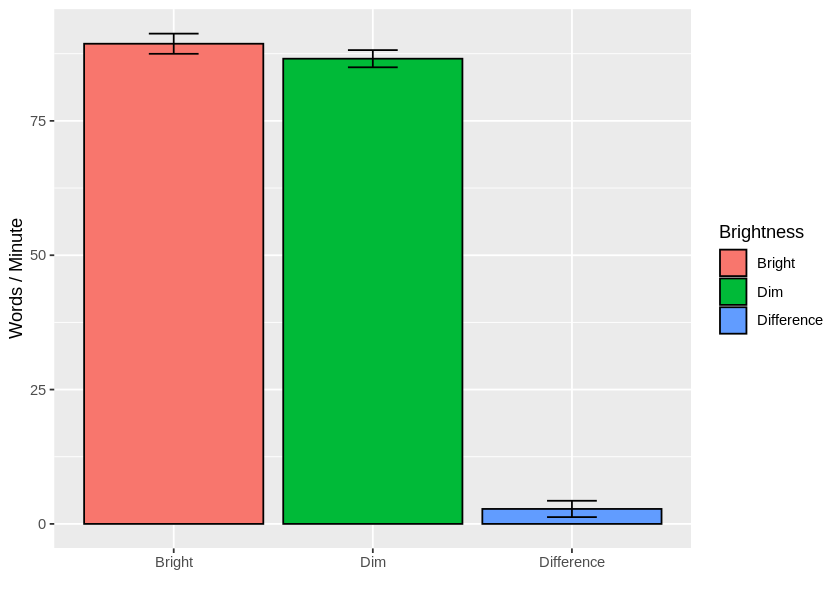

In [28]:
ggplot(plotData, aes(x = lightLvl, y = Mean)) +
  geom_bar(stat = "identity", colour = "black", aes(fill = lightLvl)) +
  geom_errorbar(aes(ymin = CI_bot,
                    ymax = CI_top),
                    width = 0.25) +
  xlab("") + ylab("Words / Minute") +
  labs(fill = "Brightness")

In [21]:
# Automated Method
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘deldir’, ‘RcppEigen’, ‘png’, ‘jpeg’, ‘interp’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’




In [29]:
new_candle$lightLvl <- factor(new_candle$lightLvl, 
                                levels = c("Bright", "Dim", "Difference"))

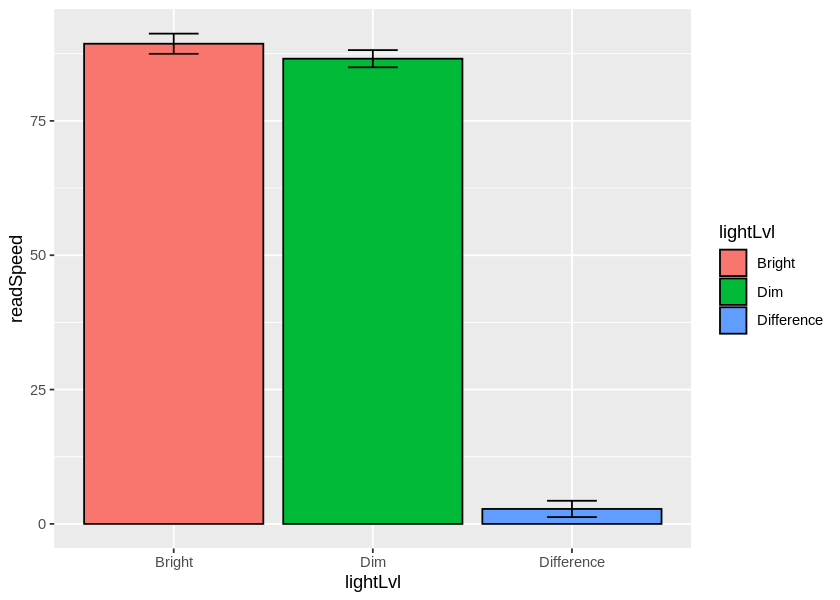

In [30]:
ggplot(new_candle, aes(x = lightLvl, y = readSpeed)) +
  geom_bar(stat = "summary", fun = mean, aes(fill = lightLvl), colour = "black") +
  geom_errorbar(stat = "summary", fun.data = "mean_cl_normal",
                  fun.args = list(conf.int = 0.95),
                  width = 0.25)

In [31]:
diffScores

id,readSpeed,lightLvl
<int>,<int>,<chr>
1,4,Difference
2,-1,Difference
3,2,Difference
4,5,Difference
5,5,Difference
6,0,Difference
7,7,Difference
8,2,Difference
9,4,Difference


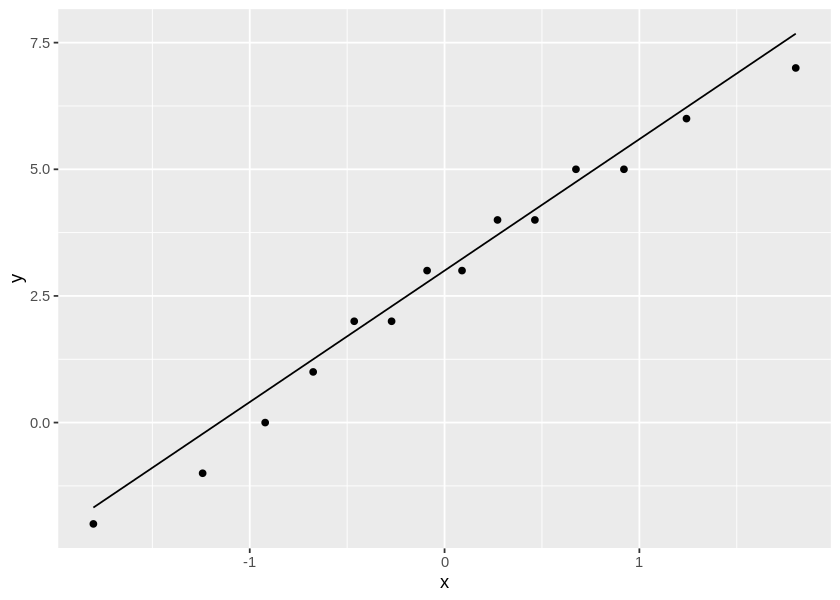

In [32]:
ggplot(diffScores, aes(sample = readSpeed)) +
  stat_qq() +
  stat_qq_line()